# Metropolis-Hastings example


## Default target distribution example

### Load libraries

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import time
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..', 'library')))

from mcmc_utils import target_distribution, proposal_distribution
from mcmc_algorithms import metropolis_hastings

### Run the model

In [ ]:
# Use the default target distribution (standard normal distribution)
target_dist_default = target_distribution()

# Parameters
initial_value = 0.0
num_iterations = 100000

# Run MCMC sampler
samples, elapsed_time, acceptance_rate = metropolis_hastings(target_dist_default, proposal_distribution, initial_value, num_iterations)

Sampling:  87%|████████▋ | 86730/100000 [00:42<00:05, 2217.65iteration/s, acceptance_rate=0.703]

### Summary

In [ ]:
# Print time taken and acceptance rate
print(f"Time taken: {elapsed_time:.2f} seconds")
print(f"Acceptance rate: {acceptance_rate:.2f}")

Time taken: 51.07 seconds
Acceptance rate: 0.70


### Plots

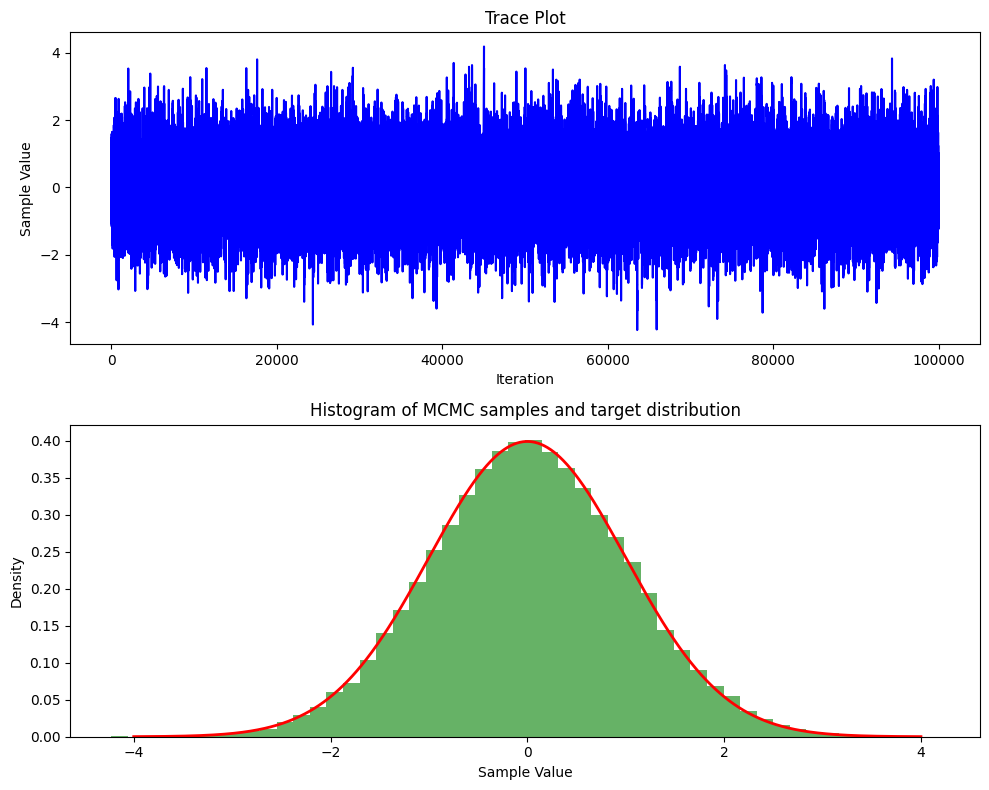

In [ ]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Plot trace plot
ax1.plot(samples, color='blue')
ax1.set_title('Trace Plot')
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Sample Value')

# Plot histogram of samples and target distribution
ax2.hist(samples, bins=50, density=True, alpha=0.6, color='g')
x = np.linspace(-4, 4, 1000)
ax2.plot(x, target_dist_default(x), 'r', lw=2)
ax2.set_title('Histogram of MCMC samples and target distribution')
ax2.set_xlabel('Sample Value')
ax2.set_ylabel('Density')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

### Run the model multiple times and track time

In [ ]:
# Parameters
initial_value = 0.0
iterations_list = [10000, 20000, 50000, 100000, 200000, 250000]
times_taken = []

# Run MCMC sampler for different numbers of iterations
for num_iterations in iterations_list:
    start_time = time.time()
    samples, elapsed_time, acceptance_rate = metropolis_hastings(target_dist_default, proposal_distribution, initial_value, num_iterations)
    end_time = time.time()
    times_taken.append(elapsed_time)
    print(f"Iterations: {num_iterations}, Time taken: {elapsed_time:.2f} seconds, Acceptance rate: {acceptance_rate:.2f}")


Sampling: 100%|██████████| 10000/10000 [00:05<00:00, 1919.29iteration/s, acceptance_rate=0.708]


Iterations: 10000, Time taken: 5.21 seconds, Acceptance rate: 0.71


Sampling: 100%|██████████| 20000/20000 [00:10<00:00, 1937.52iteration/s, acceptance_rate=0.709]


Iterations: 20000, Time taken: 10.32 seconds, Acceptance rate: 0.71


Sampling: 100%|██████████| 50000/50000 [00:28<00:00, 1747.17iteration/s, acceptance_rate=0.705]


Iterations: 50000, Time taken: 28.62 seconds, Acceptance rate: 0.70


Sampling: 100%|██████████| 100000/100000 [00:51<00:00, 1945.43iteration/s, acceptance_rate=0.705]


Iterations: 100000, Time taken: 51.40 seconds, Acceptance rate: 0.70


Sampling: 100%|██████████| 200000/200000 [01:51<00:00, 1793.64iteration/s, acceptance_rate=0.704]


Iterations: 200000, Time taken: 111.51 seconds, Acceptance rate: 0.70


Sampling: 100%|██████████| 250000/250000 [02:06<00:00, 1979.90iteration/s, acceptance_rate=0.704]


Iterations: 250000, Time taken: 126.27 seconds, Acceptance rate: 0.70


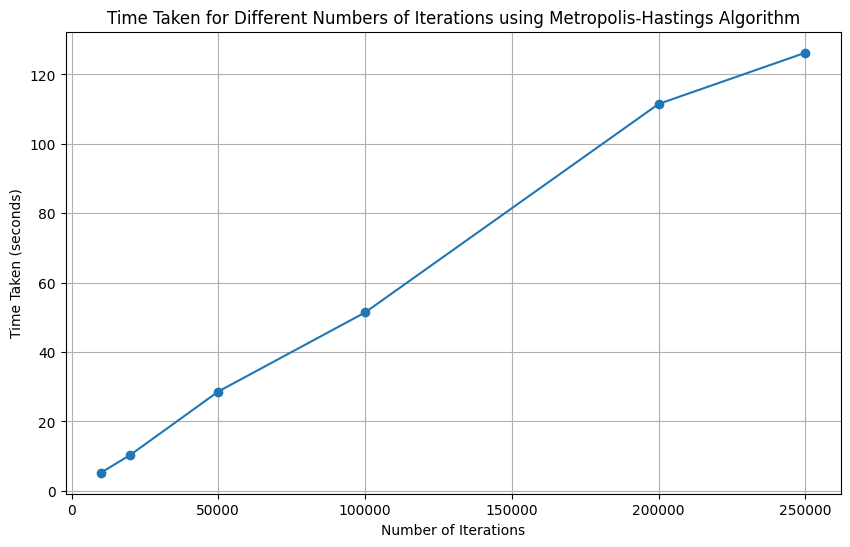

In [ ]:
# Plot time taken for different numbers of iterations
plt.figure(figsize=(10, 6))
plt.plot(iterations_list, times_taken, marker='o')
plt.title('Time Taken for Different Numbers of Iterations using Metropolis-Hastings Algorithm')
plt.xlabel('Number of Iterations')
plt.ylabel('Time Taken (seconds)')
plt.grid(True)
plt.show()

## Custom target distribution example

### Run the model

In [ ]:
# Define a custom target distribution using a mathematical expression
expression = '0.3 * exp(-0.5 * x**2) / sqrt(2 * pi) + 0.7 * exp(-0.5 * (x - 3)**2) / sqrt(2 * pi)'

# Create the target distribution function with a custom expression
target_dist_custom = target_distribution(expression)

# Use the target_dist_default function in your MCMC sampler
initial_value = 0.0
num_iterations = 100000

# Use the target_dist_custom function in your MCMC sampler
samples_custom, elapsed_time_custom, acceptance_rate_custom = metropolis_hastings(target_dist_custom, proposal_distribution, initial_value, num_iterations)


Sampling: 100%|██████████| 50000/50000 [00:24<00:00, 2016.44iteration/s, acceptance_rate=0.788]


### Summary

In [ ]:
# Print time taken and acceptance rate
print(f"Time taken: {elapsed_time:.2f} seconds")
print(f"Acceptance rate: {acceptance_rate:.2f}")

Time taken: 51.07 seconds
Acceptance rate: 0.70


### Plots

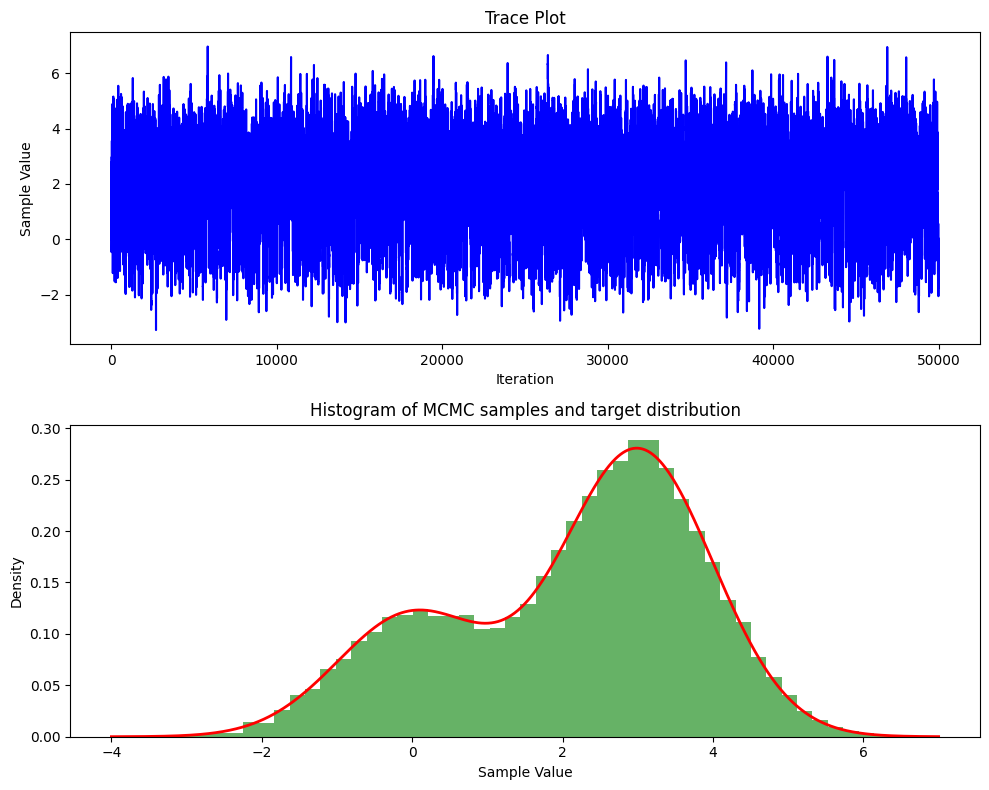

In [ ]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Plot trace plot
ax1.plot(samples_custom, color='blue')
ax1.set_title('Trace Plot')
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Sample Value')

# Plot histogram of samples and target distribution
ax2.hist(samples_custom, bins=50, density=True, alpha=0.6, color='g')
x = np.linspace(-4, 7, 1000)
ax2.plot(x, target_dist_custom(x), 'r', lw=2)
ax2.set_title('Histogram of MCMC samples and target distribution')
ax2.set_xlabel('Sample Value')
ax2.set_ylabel('Density')

# Adjust layout and show plot
plt.tight_layout()
plt.show()